# Data exporation 

in this section we will be exploring the data and preprocessing it for the model.



## imports

In [1]:
import pandas as pd
import helper
import seaborn as sns

## Raw data

In [2]:
data = pd.read_csv('../input/dataset.csv', index_col=0)
data.head()



,vote_count,vote_average,title,tagline,status,spoken_languages,duration,revenue,release,countries_of_production,production,popularity,overview,original_title,original_language,keywords,id,homepage,genres,financial_investment
0,11800,7.2,Avatar,Enter the World of Pandora.,Released,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",162.0,2.787965e+09,2009-12-10,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...",150.437577,"In the 22nd century, a paraplegic Marine is di...",Avatar,en,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",19995,http://www.avatarmovie.com/,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",237000000.0
1,4500,6.9,Pirates of the Caribbean: At World's End,"At the end of the world, the adventure begins.",Released,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",169.0,9.610000e+08,2007-05-19,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",139.082615,"Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End,en,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",285,http://disney.go.com/disneypictures/pirates/,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",300000000.0
2,4466,6.3,Spectre,A Plan No One Escapes,Released,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",148.0,8.806746e+08,2015-10-26,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",107.376788,A cryptic message from Bond’s past sends him o...,Spectre,en,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",206647,http://www.sonypictures.com/movies/spectre/,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",245000000.0
3,9106,7.6,The Dark Knight Rises,The Legend Ends,Released,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",165.0,1.084939e+09,2012-07-16,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",112.312950,Following the death of District Attorney Harve...,The Dark Knight Rises,en,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",49026,http://www.thedarkknightrises.com/,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",250000000.0
4,2124,6.1,John Carter,"Lost in our world, found in another.",Released,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",132.0,2.841391e+08,2012-03-07,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",43.926995,"John Carter is a war-weary, former military ca...",John Carter,en,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",49529,http://movies.disney.com/john-carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",260000000.0


In [3]:
raw_data = data.copy()
cols_with_text = raw_data.select_dtypes(include=['object']).columns
raw_data = raw_data.drop(columns=cols_with_text)
raw_data.dropna(inplace=True)
#helper.test_data_set(raw_data)


## drop non relevent columns / entries

In [4]:
drop_list = ["title", "tagline", "production","overview","original_title","homepage","id"]


data = data.dropna(subset=['revenue'])
data = data.drop(drop_list, axis=1)
data.head()

,vote_count,vote_average,status,spoken_languages,duration,revenue,release,countries_of_production,popularity,original_language,keywords,genres,financial_investment
0,11800,7.2,Released,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",162.0,2.787965e+09,2009-12-10,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",150.437577,en,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",237000000.0
1,4500,6.9,Released,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",169.0,9.610000e+08,2007-05-19,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",139.082615,en,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",300000000.0
2,4466,6.3,Released,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",148.0,8.806746e+08,2015-10-26,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",107.376788,en,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",245000000.0
3,9106,7.6,Released,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",165.0,1.084939e+09,2012-07-16,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",112.312950,en,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",250000000.0
4,2124,6.1,Released,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",132.0,2.841391e+08,2012-03-07,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",43.926995,en,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",260000000.0


## extracting json data




In [5]:
data["spoken_languages"] = data["spoken_languages"].apply(helper.extract_iso_values_to_string, key="iso_639_1")
data["countries_of_production"] = data["countries_of_production"].apply(helper.extract_iso_values_to_string, key="iso_3166_1")
data["keywords"] = data["keywords"].apply(helper.extract_iso_values_to_string, key="name")
data["genres"] = data["genres"].apply(helper.extract_iso_values_to_string, key="name")

data.head()



,vote_count,vote_average,status,spoken_languages,duration,revenue,release,countries_of_production,popularity,original_language,keywords,genres,financial_investment
0,11800,7.2,Released,"en,es",162.0,2.787965e+09,2009-12-10,"US,GB",150.437577,en,"culture clash,future,space war,space colony,so...","Action,Adventure,Fantasy,Science Fiction",237000000.0
1,4500,6.9,Released,en,169.0,9.610000e+08,2007-05-19,US,139.082615,en,"ocean,drug abuse,exotic island,east india trad...","Adventure,Fantasy,Action",300000000.0
2,4466,6.3,Released,"fr,en,es,it,de",148.0,8.806746e+08,2015-10-26,"GB,US",107.376788,en,"spy,based on novel,secret agent,sequel,mi6,bri...","Action,Adventure,Crime",245000000.0
3,9106,7.6,Released,en,165.0,1.084939e+09,2012-07-16,US,112.312950,en,"dc comics,crime fighter,terrorist,secret ident...","Action,Crime,Drama,Thriller",250000000.0
4,2124,6.1,Released,en,132.0,2.841391e+08,2012-03-07,US,43.926995,en,"based on novel,mars,medallion,space travel,pri...","Action,Adventure,Science Fiction",260000000.0


## converting realease date

In [6]:
data["release"] = data["release"].apply(helper.convert_datestring_to_days_since_2000)



## missing entries

In [7]:
# missing entries

missing_entries = data.isnull().sum()
print(missing_entries)


vote_count                   0
vote_average               479
status                       0
spoken_languages             0
duration                     2
revenue                      0
release                      0
countries_of_production      0
popularity                   0
original_language          236
keywords                     0
genres                       0
financial_investment       380
dtype: int64


## extended imputation

removed missing entries for "original_language" because of exit code (2) with the simple imputer

In [8]:
# number of missing entries
data = data.dropna(subset=["original_language"])
data = helper.extended_imputation(data)



cols with missing data : ['vote_average', 'duration', 'financial_investment']


## one hot encoding

### results with list one hot encoding: 

- Number of columns in the one-hot encoded data for spoken_languages: 87
- Number of columns in the one-hot encoded data for countries_of_production: 88
- Number of columns in the one-hot encoded data for production: 5017
- Number of columns in the one-hot encoded data for keywords: 9813
- Number of columns in the one-hot encoded data for genres: 20

#### the only usable list is for genres, we will use the list one hot encoding for the rest
### results with list one hot encoding only first in list: 

- Number of columns in the one-hot encoded data for spoken_languages: 56
- Number of columns in the one-hot encoded data for countries_of_production: 70
- Number of columns in the one-hot encoded data for production: 1316
- Number of columns in the one-hot encoded data for keywords: 1351
- Number of columns in the one-hot encoded data for genres: 20

### we will ordinal encode all columns apart from genre and status



In [9]:
import helper

ohe_data = helper.one_hot_encode_column(data, 'status')
ohe_data = helper.one_hot_encode_column(ohe_data, 'genres')
ohe_data = ohe_data.drop(columns=['status', 'genres'], axis=1)
ohe_data.head()



Number of columns in the one-hot encoded data for status: 3
Number of columns in the one-hot encoded data for genres: 20


,vote_count,vote_average,spoken_languages,duration,revenue,release,countries_of_production,popularity,original_language,keywords,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,11800.0,7.2,"en,es",162.0,2.787965e+09,3631.0,"US,GB",150.437577,en,"culture clash,future,space war,space colony,so...",...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,4500.0,6.9,en,169.0,9.610000e+08,2695.0,US,139.082615,en,"ocean,drug abuse,exotic island,east india trad...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4466.0,6.3,"fr,en,es,it,de",148.0,8.806746e+08,5777.0,"GB,US",107.376788,en,"spy,based on novel,secret agent,sequel,mi6,bri...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9106.0,7.6,en,165.0,1.084939e+09,4580.0,US,112.312950,en,"dc comics,crime fighter,terrorist,secret ident...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2124.0,6.1,en,132.0,2.841391e+08,4449.0,US,43.926995,en,"based on novel,mars,medallion,space travel,pri...",...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## ordinal encoding




In [10]:
oe_data = helper.ordinal_encode_column(ohe_data, 'spoken_languages')
oe_data = helper.ordinal_encode_column(ohe_data, 'original_language')

oe_data = helper.ordinal_encode_column(oe_data, 'countries_of_production')
oe_data = helper.ordinal_encode_column(oe_data, 'keywords')

drop_list = ["spoken_languages","countries_of_production","keywords","original_language"]
data = oe_data.drop(drop_list,axis=1)
data.head()


,vote_count,vote_average,duration,revenue,release,popularity,financial_investment,Post Production,Released,Rumored,...,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,original_language_encoded,countries_of_production_encoded,keywords_encoded
0,11800.0,7.2,162.0,2.787965e+09,3631.0,150.437577,237000000.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,312.0,175.0
1,4500.0,6.9,169.0,9.610000e+08,2695.0,139.082615,300000000.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,372.0,467.0
2,4466.0,6.3,148.0,8.806746e+08,5777.0,107.376788,245000000.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,312.0,1826.0
3,9106.0,7.6,165.0,1.084939e+09,4580.0,112.312950,250000000.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,372.0,1959.0
4,2124.0,6.1,132.0,2.841391e+08,4449.0,43.926995,260000000.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,372.0,124.0


## Standardize the data

In [11]:
#data = helper.data_standardizer(data)

data = data.dropna()
data.describe()

,vote_count,vote_average,duration,revenue,release,popularity,financial_investment,Post Production,Released,Rumored,...,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,original_language_encoded,countries_of_production_encoded,keywords_encoded
count,4253.000000,4253.000000,4253.000000,4.253000e+03,4253.000000,4253.000000,4.253000e+03,4253.000000,4253.000000,4253.000000,...,4253.000000,4253.000000,4253.000000,4253.000000,4253.000000,4253.000000,4253.000000,4253.000000,4253.000000,4253.000000
mean,727.877028,6.130174,108.054936,8.720221e+07,1117.387961,22.354262,3.061639e+07,0.000705,0.998119,0.001176,...,0.071949,0.187632,0.111686,0.001881,0.266400,0.029861,0.016224,8.487186,303.030567,1862.121326
std,1258.934133,1.017206,21.967263,1.669863e+08,4383.148432,29.375940,3.978911e+07,0.026553,0.043335,0.034271,...,0.258434,0.390464,0.315017,0.043335,0.442128,0.170225,0.126350,3.105338,113.302022,1258.073315
min,0.000000,0.000000,0.000000,0.000000e+00,-26654.000000,0.000372,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,67.000000,5.700000,95.000000,0.000000e+00,-211.000000,5.581743,3.000000e+06,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,284.000000,735.000000
50%,267.000000,6.100000,104.000000,2.400732e+07,2081.000000,14.182301,2.000000e+07,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,372.000000,1852.000000
75%,797.000000,6.700000,118.000000,9.845006e+07,4015.000000,29.464852,4.000000e+07,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,8.000000,372.000000,2970.000000
max,13752.000000,10.000000,338.000000,2.787965e+09,6243.000000,724.247784,3.800000e+08,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,37.000000,374.000000,3976.000000


# benchmark

RMSE for 30 estimators: 1.4206394088544267


/Users/house/Desktop/machine learning/machineLearning/data_exploration/helper.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['revenue'] = raw_data['revenue'].apply(revenue_log)


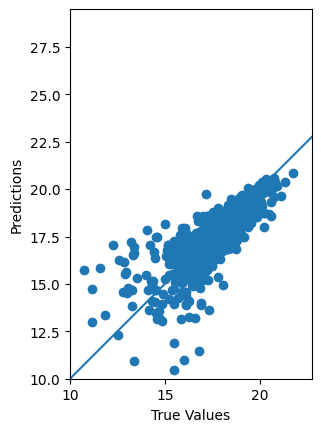

In [12]:
helper.test_data_set(data)


In [13]:
data.head()


,vote_count,vote_average,duration,revenue,release,popularity,financial_investment,Post Production,Released,Rumored,...,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,original_language_encoded,countries_of_production_encoded,keywords_encoded
0,11800.0,7.2,162.0,2.787965e+09,3631.0,150.437577,237000000.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,312.0,175.0
1,4500.0,6.9,169.0,9.610000e+08,2695.0,139.082615,300000000.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,372.0,467.0
2,4466.0,6.3,148.0,8.806746e+08,5777.0,107.376788,245000000.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,312.0,1826.0
3,9106.0,7.6,165.0,1.084939e+09,4580.0,112.312950,250000000.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,372.0,1959.0
4,2124.0,6.1,132.0,2.841391e+08,4449.0,43.926995,260000000.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,372.0,124.0


KeyError: 'keywords_encoded'

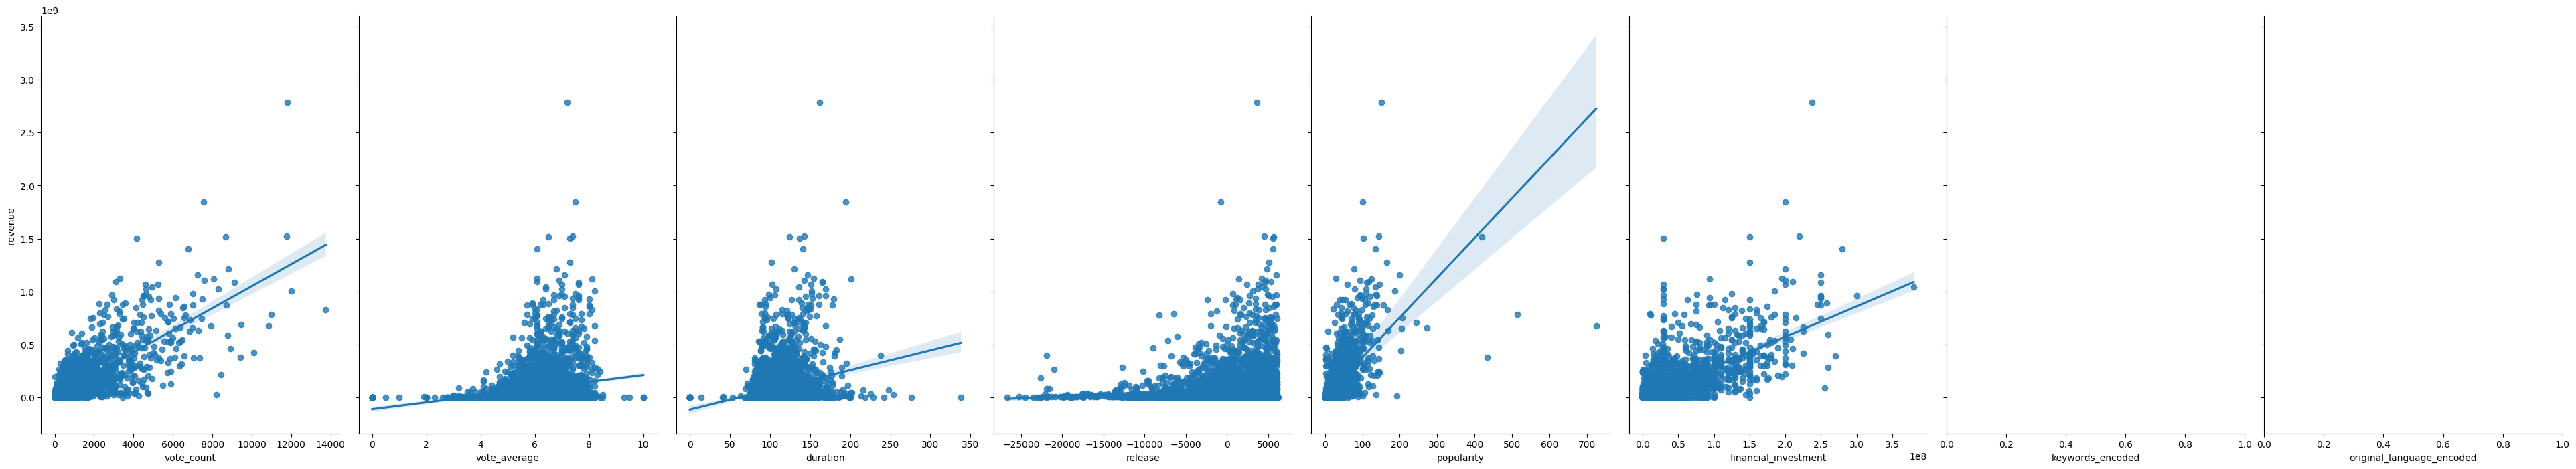

In [17]:
sns.pairplot(data, x_vars=['vote_count', 'vote_average', 'duration', 'release', 'popularity','financial_investment', "keywords_encoded", "original_language_encoded"], y_vars='revenue', height=7, aspect=0.7, kind='reg')


RMSE for 30 estimators: 1.417410473287579


/Users/house/Desktop/machine learning/machineLearning/data_exploration/helper.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['revenue'] = raw_data['revenue'].apply(revenue_log)


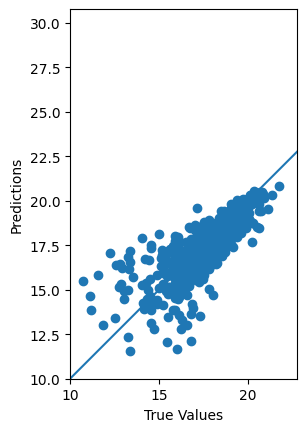

In [15]:
data = data.drop(columns =[ 'countries_of_production_encoded','original_language_encoded','keywords_encoded'])
data.to_csv('../input/preprocessed_data.csv')

helper.test_data_set(data)